# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 53 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

## Алгоритм DBSCAN

```{C}
1.function dbscan(X, eps, min_pts):
2.	initialize NV = X # not visited objects	
3.	for x in NV:
4.		remove(NV, x) # mark as visited
5.		nbr = neighbours(x, eps) # set of neighbours
6.		if nbr.size < min_pts:
7.			mark_as_noise(x)
8.		else:
9.			C = new_cluster() 
10.			expand_cluster(x, nbr, C, eps, min_pts, NV)
11.			yield C
```

## Метод `expand_cluster`

```{C}
1. function expand_cluster(x, nbr, C, eps, min_pts, NV):
2.	add(x, C)
3.	for x1 in nbr:
4.		if x1 in NV: # object not visited
5.			remove(NV, x1) # mark as visited
6.			nbr1 = neighbours(x1, eps)
7.			if nbr1.size >= min_pts:
8.				# join sets of neighbours
9.				merge(nbr, nbr_1) 
10.		if x1 not in any cluster:
11.			add(x1, C)		
```

In [2]:
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict

In [3]:
## Задание 1
import time
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, eps, min_pts):
        
        self.eps = eps
        self.min_pts = min_pts
            
    def distance(self, x1, x2):
        return np.linalg.norm(x1 - x2)
     
    def neighbours(self, p_idx, p, data, eps):
        #return np.array([i for i, x in enumerate(data) if self.distance(x[:-2], p[:-2]) < eps]) 
        return np.array([i for i, x in enumerate(data) if self.dists[p_idx][i] <= eps])
        
    
    def compute_distances(self, X):
        return euclidean_distances(X, X)
    
    def fit(self, X, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.X_len = len(X)
        self.dists = self.compute_distances(X)
        
        # not visited objects (add column with flags 0 (not visited) and (visited)
        X = np.hstack((X, np.zeros((X.shape[0], 1))))

        # add cluster labels column
        X = np.hstack((X, np.zeros((X.shape[0], 1))))
        
        C = 0
        
        self.sum_time = 0
        for i, x in enumerate(X):
            # if x is visited
            if X[i][-2] == 1:
                continue
            X[i][-2] = 1 # mark as visited
            
            nbrs_idxs = self.neighbours(i, x, X, self.eps) # set of neighbours indices
            
            if len(nbrs_idxs) < self.min_pts:
                X[i][-1] = -1 # mark as noise
            else:
                C += 1 
                X = self.expand_cluster(i, nbrs_idxs, C, self.eps, self.min_pts, X)
        
        self.data = X
        self.labels = X[:,-1]
        
        return self
    
    def expand_cluster(self, x_idx, nbrs_idxs, C, eps, min_pts, X):
        #add x to cluster C
        X[x_idx][-1] = C
        while len(nbrs_idxs) > 0: 
            p_idx = nbrs_idxs[0] # take first element
            nbrs_idxs = nbrs_idxs[1:] # delete first element from neighbours
            
            if X[p_idx][-2] == 1:
                continue
            else:
                X[p_idx][-2] = 1 # mark p as visited
            
            # QNeighborPts = regionQuery(p, eps)
            p_nbrs_idxs = self.neighbours(p_idx, X[p_idx], X, eps)
            
            #print("nbrs:", p_idx, p_nbrs_idxs)
            if len(p_nbrs_idxs) >= min_pts:
                #NeighborPts = NeighborPts joined with QNeighborPts
                nbrs_idxs = np.append(nbrs_idxs, p_nbrs_idxs)
            # if p is not yet member of any cluster add p to cluster C
            if X[p_idx][-1] <= 0:
                X[p_idx][-1] = C 
                
        return X
       
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.data[:,-1]
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

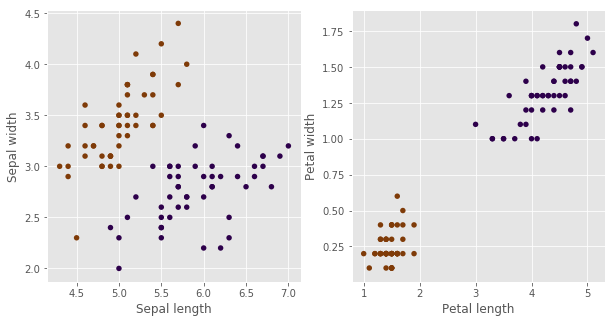

In [4]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_st = scaler.fit_transform(x_iris)

In [6]:
X_st[0]

array([-0.5810659 ,  0.85713543, -1.01435952, -1.03824799])

In [7]:
from sklearn.datasets import make_blobs, make_biclusters, make_circles, make_moons
X_gen, y_gen = make_blobs(n_samples=1000, n_features=6, centers=5, cluster_std=6, 
           center_box=(-100.0, 100.0), shuffle=False, random_state=1234)

X_circ, y_circ = make_moons(n_samples=1000, noise=0.1)

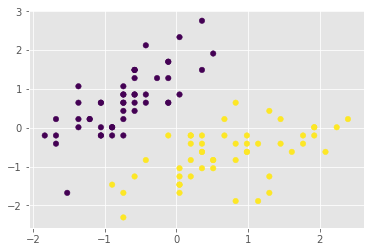

In [8]:
plt.scatter(X_st[:,0], X_st[:,1], c=y_iris, s=30)

In [9]:
X_gen = scaler.fit_transform(X_gen)

In [10]:
X_circ = scaler.fit_transform(X_circ)

CPU times: user 30.1 ms, sys: 4.44 ms, total: 34.5 ms
Wall time: 25.8 ms


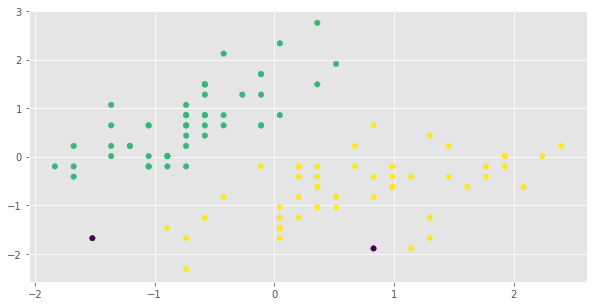

In [11]:
dbscan = Clustering(eps=0.9, min_pts=5)
%time dbscan.fit(X_st)
plt.figure(figsize=(10, 5))
plt.scatter(X_st[:,0], X_st[:, 1], c=dbscan.labels, s=30)

In [12]:
from sklearn.cluster import DBSCAN

CPU times: user 3.42 ms, sys: 2.47 ms, total: 5.89 ms
Wall time: 11.2 ms


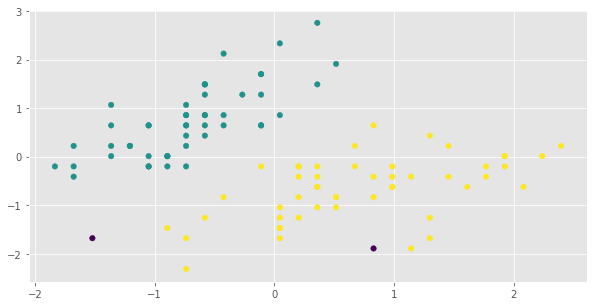

In [13]:
db = DBSCAN(eps=0.9, min_samples=5)
%time db.fit(X_st)
plt.figure(figsize=(10, 5))
plt.scatter(X_st[:,0], X_st[:, 1], c=db.labels_, s=30)

In [14]:
from sklearn.metrics import adjusted_rand_score

In [17]:
adjusted_rand_score(db.labels_, dbscan.labels)

1.0

In [20]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5,metric='euclidean')
nn.fit(X_st)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [21]:
dist, ind = nn.kneighbors(X_st, n_neighbors=5, return_distance=True)

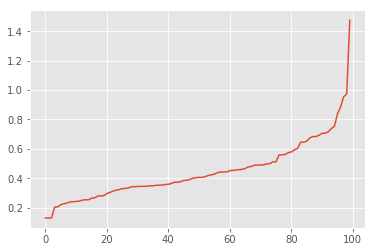

In [22]:
mean_dist = dist[:, 1:].mean(axis=1)
mean_dist = np.sort(mean_dist)
plt.plot(mean_dist)

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

### Критерий Silhouette

Пусть дана кластеризация в $K$ кластеров, и объект $i$ попал в $C_k$

* $a(i)$ - среднее расстояние от $i$ объекта до объектов из $C_k$
* $b(i) = min_{j \neq k} b_j(i)$,  где $b_j(i)$ - среднее расстояние от $i$ объекта до объектов из $C_j$
$$
silhouette(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$
Средний silhouette для всех точек из $\mathbf{X}$ является критерием качества кластеризации.

In [179]:
from sklearn.metrics import silhouette_samples, silhouette_score , pairwise_distances

In [24]:
def make_sil(X, labels):
    plt.figure(figsize=(10, 5))
    sil = silhouette_samples(X, labels)
    print("silhouette mean: %f" %(sil.mean()))
    sil_scores = pd.DataFrame(np.c_[labels, sil], columns=['labels', 'sil'])
    sil_scores = sil_scores.sort_values(['labels', 'sil'])
    plt.plot(sil_scores.sil.values)
    return sil_scores

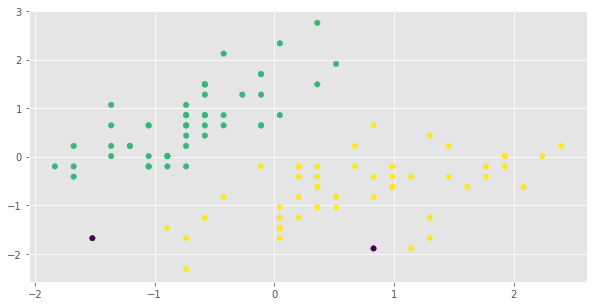

In [26]:
dbscan = Clustering(eps=0.9, min_pts=5)
dbscan.fit(X_st)
plt.figure(figsize=(10, 5))
plt.scatter(X_st[:,0], X_st[:, 1], c=dbscan.labels, s=30)

silhouette mean: 0.517715


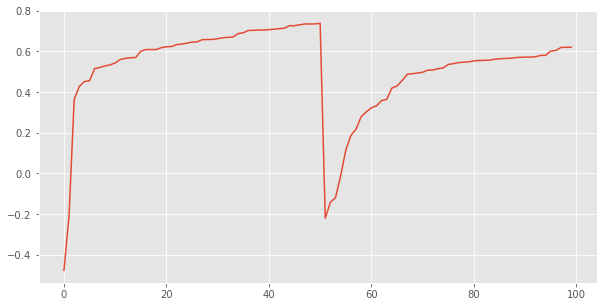

In [100]:
sil_scores = make_sil(X_st, dbscan.labels)

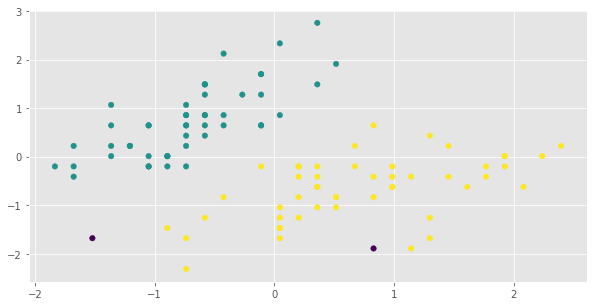

In [79]:
db = DBSCAN(eps=0.9, min_samples=5)
db.fit(X_st)
plt.figure(figsize=(10, 5))
plt.scatter(X_st[:,0], X_st[:, 1], c=db.labels_, s=30)

silhouette mean: 0.517715


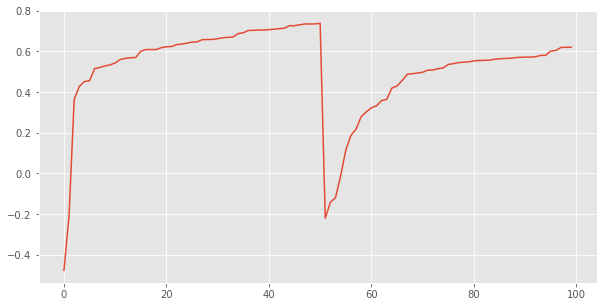

In [101]:
sil_scores_db = make_sil(X_st, db.labels_)

silhouette mean: 0.517715


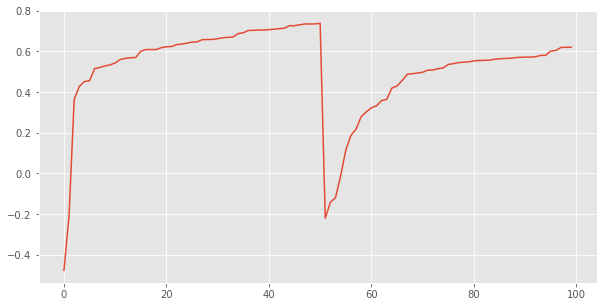

In [102]:
sil_scores_dbscan = make_sil(X_st, dbscan.labels)

In [36]:
def mean_dist(x, X_k):
    if not len(X_k): 
        return 0
    res = [np.linalg.norm(x - p) for p in X_k]
    return np.sum(res) / len(res) 

In [33]:
## Задание 2
def quality(X, labels):
    K = list(set(labels[labels >= 0]))
    if len(K) < 2 or len(K) > len(X):
        return np.zeros(0)
    X = np.c_[X, labels]
    
    silhouette = np.array([])
    for i, x in enumerate(X):

        a_i = mean_dist(x[:-1], [p[:-1] for j, p in enumerate(X) if p[-1] == x[-1] and j != i])        
        b_i = np.min([mean_dist(x[:-1], [p[:-1] for p in X if p[-1] == k]) for k in K if k != x[-1]])
        
        tmp = (np.max([a_i, b_i]))
        sil = 0
        if tmp:
            sil = (float)(b_i - a_i) / tmp
        else:
            sil = 0
        silhouette = np.append(silhouette, sil)
    return silhouette

In [529]:
res_sil = quality(X_st, dbscan.labels)

mean sil: 0.621070


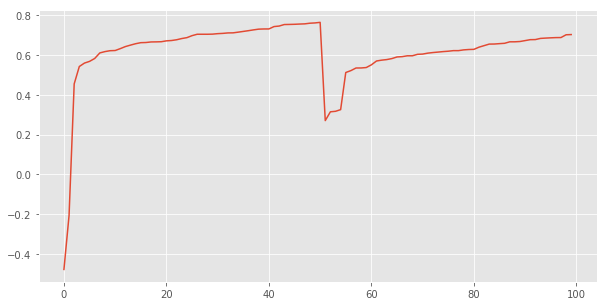

In [530]:
sil_scores = pd.DataFrame(np.c_[dbscan.labels, res_sil], columns=['labels', 'sil'])
sil_scores = sil_scores.sort_values(['labels', 'sil'])
print("mean sil: %f" %(res_sil.mean()))
plt.figure(figsize=(10, 5))
plt.plot(sil_scores.sil.values)

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [51]:
def choose_eps(X, min_val=0.1, max_val=1, min_pts=5):
    eps_list = np.linspace(min_val, max_val, 20)
    criteria = np.zeros(len(eps_list))
    
    for i, eps in enumerate(eps_list):
        cls = Clustering(min_pts=min_pts,eps=eps )
        y = cls.fit_predict(X)
        sil_values = quality(X, y)
        if len(sil_values) > 0:
            criteria[i] = sil_values.mean()
        else:
            criteria[i] = 0;

    
    pl.figure(figsize=(8, 6))
    pl.plot(eps_list, criteria, marker = 'o')
    pl.title("$J(k)$")
    pl.ylabel("Criteria $J$")
    pl.xlabel("Eps value $e$, min_pts = %d" %(min_pts))
    pl.grid()
    pl.show()
    return np.max(criteria), eps_list[np.argmax(criteria)]
    

Из графика ниже видно что оптимальные значения eps будут в районе 0.8 - 1.5

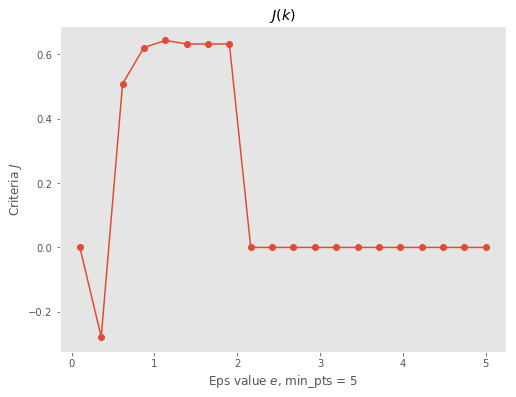

(0.64300348322747325, 1.1315789473684212)

In [52]:
choose_eps(X_st, max_val=5)

In [16]:
## Задание 3
data = pd.read_csv('WDIData.csv', sep=',')

Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

In [17]:
pd.options.display.max_columns = None

In [18]:
data.shape

(409992, 62)

In [19]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.599691,77.443095,78.244950,79.019267,79.792525,80.570694,81.349369,82.112282,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.148698,76.563545,74.066866,74.846070,75.303935,76.042330,76.768569,77.147080,77.985792,78.553012,79.236166,79.768294,80.229593,80.968355,82.628794,83.351979,83.787901,84.391665,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.358095,60.178350,61.295216,62.106617,62.967334,63.729726,64.701319,64.952707,66.387754,64.089342,65.189090,65.527418,66.220836,67.480753,67.516663,70.091789,70.265305,71.237599,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [20]:
all_country_names = data['Country Name'].unique()

In [21]:
print(data['Country Name'][72991]) # c индекса 72991 начинаются страны

Afghanistan


In [22]:
df_cleaned = data.drop(range(72991), axis = 0)
df_cleaned.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
72991,Afghanistan,AFG,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.132160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72992,Afghanistan,AFG,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.709670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72993,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.666341,22.408223,22.102606,21.758705,21.385711,20.992827,20.589262,20.182705,19.774789,19.365638,18.955386,18.544137,18.132025,17.719179,17.305714,NaN,NaN,NaN
72994,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016871,0.163713,1.006099,3.467205,7.209179,13.969172,23.000000,27.506411,34.290512,42.400000,47.888466,42.700000,61.514420,69.100000,75.154373,89.500000,NaN,NaN,NaN
72995,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047561,0.389324,1.767830,2.413901,13.000000,17.332747,24.826653,32.500000,39.877850,32.400000,54.988701,63.800000,70.129379,87.800000,NaN,NaN,NaN


In [23]:
len(df_cleaned['Country Name'].unique())

217

In [24]:
df_cleaned.shape

(337001, 62)

In [25]:
country_names = unique(df_cleaned['Country Name'].as_matrix())
len(country_names)

217

Из-за недостатка данных возьмем среднее по каждому параметру по всем годам

In [26]:
new_df = pd.DataFrame()
for name in country_names:
    new_df[name] = \
    pd.DataFrame(df_cleaned.loc[df_cleaned['Country Name'] == name].mean(1).as_matrix(), index=range(1553),columns=[country_names[0]])

In [27]:
new_df.head()

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,Channel Islands,Chile,China,Colombia,Comoros,"Congo, Dem. Rep.","Congo, Rep.",Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,"Egypt, Arab Rep.",El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Faroe Islands,Fiji,Finland,France,French Polynesia,Gabon,"Gambia, The",Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,"Hong Kong SAR, China",Hungary,Iceland,India,Indonesia,"Iran, Islamic Rep.",Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,"Korea, Dem. People’s Rep.","Korea, Rep.",Kosovo,Kuwait,Kyrgyz Republic,Lao PDR,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,"Macao SAR, China","Macedonia, FYR",Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russian Federation,Rwanda,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Martin (French part),St. Vincent and the Grenadines,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
0,15.132160,43.639880,31.807370,NaN,NaN,44.487553,1.774195,1.269396,178.580472,NaN,1.388356,0.886404,0.331889,0.773425,0.248763,22.641618,1.236742,779.325783,0.899600,1.221769,219.584704,NaN,15.738848,2.232475,0.718168,2.420824,1.356743,NaN,0.903069,0.599071,200.226569,342.964483,69.360298,1278.551591,251.015303,1.213644,NaN,263.740244,207.999830,NaN,333.690000,3.447590,1081.948116,226.194539,214.266944,268.760211,244.816900,287.485325,3.915337,NaN,NaN,0.727834,14.316236,8.590083,84.685017,1.557509,17.256160,0.422628,1.616057,0.495456,287.423106,6.311975,0.501982,2.254016,NaN,1.429743,0.977232,0.923334,NaN,256.230310,7.560359,0.737989,0.866875,0.372059,NaN,0.714037,NaN,1.827136,NaN,4.021715,1219.348401,217.300347,87.108280,17.568760,8.151283,5.687780,128.593823,99.078463,14.668542,3934.263554,2674.755076,558.700726,1.010234,NaN,3.716937,0.866646,37.289520,129.551955,0.380515,57.606840,29.524178,0.662273,NaN,788.920135,NaN,0.213618,11.354091,2988.384990,0.429669,847.517585,3.490096,0.492553,0.734561,NaN,0.430544,0.952896,5.269521,18.389141,649.568132,39.456599,1.733921,8.133731,240.092359,0.567526,NaN,98.839501,14.677159,7.126862,0.748274,4.433991,NaN,417.221509,0.351518,4.878184,10.909450,249.693800,4.264985,NaN,22.650686,0.896154,NaN,1.535000,6.435009,226.661470,60.232169,NaN,8.896433,0.232385,19.102283,0.565869,0.520973,1.335891,2006.826775,1.486526,21.754887,1.869116,0.684330,NaN,2.745220,1.423012,12.736131,186.182288,1.628225,NaN,5558.088679,2.410441,251.667557,26.564512,3.379216,1074.121927,1.078562,NaN,0.565960,0.611603,3.200554,NaN,3.871975,NaN,0.764911,35.170179,1.875576,1.619058,NaN,1.546535,1.076807,1.601343,3.293011,9.

Заполним недостающие поля и транспонируем матрицу чтобы каждой стране соответствовали значения индикаторов

In [28]:
new_df = new_df.fillna(0).transpose()
new_df.head()

0          1           2           3           4     \
Afghanistan     15.13216  16.709670   20.125550   33.680401   31.519567   
Albania         43.63988  55.653665   57.698713  100.000000  100.000000   
Algeria         31.80737  38.739440   97.910449   97.109370   95.884123   
American Samoa   0.00000   0.000000    0.000000    0.000000    0.000000   
Andorra          0.00000   0.000000  100.000000  100.000000  100.000000   

                      5          6          7          8          9     \
Afghanistan      80.985768   9.483007   9.483007   3.214328   3.741041   
Albania         100.000000  33.127240  33.127240  28.133420  21.388165   
Algeria         100.000000  41.880950  41.880950  30.239130  29.021710   
American Samoa    0.000000   0.000000   0.000000   0.000000   0.000000   
Andorra         100.000000   0.000000   0.000000   0.000000   0.000000   

                     10         11         12         13         14    \
Afghanistan     13.322415  15.600065   3.214328   3.741041  13.322415   
Albania         41.431650  38.092185  28.133420  21.388165  41.431650   
Algeria         51.344855  53.518450  30.239130  29.021710  51.344855   
American Samoa   0.000000   0.000000   0.000000   0.000000   0.000000   
Andorra          0.000000   0.000000   0.000000   0.000000   0.000000   

                     15        16         17         18         19    \
Afghanistan     15.600065  11.02366   5.072883  26.285675   6.876474   
Albania         38.092185  34.56598  19.533410  46.231170  28.184215   
Algeria         53.518450  48.67906  39.210315  47.797785  29.374345   
American Samoa   0.000000   0.00000   0.000000   0.000000   0.000000   
Andorra          0.000000   0.00000   0.000000   0.000000   0.000000   

                     20         21         22         23         24    \
Afghanistan     15.695031  22.986309  27.620965   0.000000   0.000000   
Albania         31.209200  25.940333   5.940543  15.584136  93.520317   
Algeria          0.000000   0.000000   0.000000   0.000000  95.437668   
American Samoa   0.000000   0.000000   0.000000   0.000000   0.000000   
Andorra          0.000000   0.000000   0.000000   0.000000   0.000000   

                     25         26        27            28            29    \
Afghanistan      0.000000   0.000000  0.000000  1.425623e+10  6.970752e+09   
Albania         92.745532  93.823490  3.553440  8.818856e+09  5.215875e+09   
Algeria         92.818897  95.347391  4.268658  7.517192e+10  5.771628e+10   
American Samoa   0.000000   0.000000  0.000000  0.000000e+00  0.000000e+00   
Andorra          0.000000   0.000000  0.000000  0.000000e+00  0.000000e+00   

                    30           31           32         33            34    \
Afghanistan     0.000000   494.953612   290.201167 -19.046763 -3.412026e+09   
Albania         4.075941  2958.307010  1750.729016  11.044974  7.388075e+08   
Algeria         1.962389  2695.337789  1913.236792  24.439438  2.700710e+10   
American Samoa  0.000000     0.000000     0.000000   0.000000  0.000000e+00   
Andorra         0.000000     0.000000     0.000000   0.000000  0.000000e+00   

                     35            36        37            38        39    \
Afghanistan    -23.769559 -4.214525e+09  0.962346  2.308690e+07  7.593056   
Albania         10.027508  8.207879e+08  1.543863  2.478681e+07  8.530748   
Algeria         30.505867  4.575819e+10  1.515769  5.088580e+08  7.654330   
American Samoa   0.000000  0.000000e+00  1.619950  0.000000e+00  0.000000   
Andorra          0.000000  0.000000e+00  0.000000  4.043874e+06  9.330820   

                        40         41            42        43            44    \
Afghanistan     7.523722e+08   1.534097  1.216649e+08  0.171495  9.156182e+06   
Albania         5.455002e+08   2.903089  1.795194e+08  2.222645  9.175736e+07   
Algeria         5.026377e+09   4.798132  3.244393e+09  8.590248  7.346159e+09   
American Samoa  0.000000e+00  11.760709  1.365871e+07  0.000000  0.000000e+00   
A

In [29]:
new_df.shape

(217, 1553)

Каждой стране соответствует вектор из 1553 индикаторов

#### Кластеризация

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(new_df)

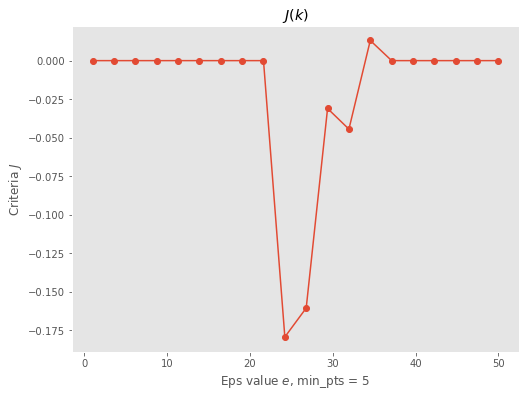

In [53]:
max_quality, best_eps = choose_eps(X, min_val=1, max_val=50, min_pts=5)

In [54]:
print("best_eps: %f\nmax quality: %f" % (best_eps, max_quality))

best_eps: 34.526316
max quality: 0.013097


In [46]:
clt = Clustering(eps=best_eps, min_pts=5)
clt.fit(X)

Clustering(eps=34.526315789473685, min_pts=5)

#### Визуализируем с помощью TSNE для DBSCAN

In [57]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=55)
tsne_vis_db = tsne.fit_transform(X)

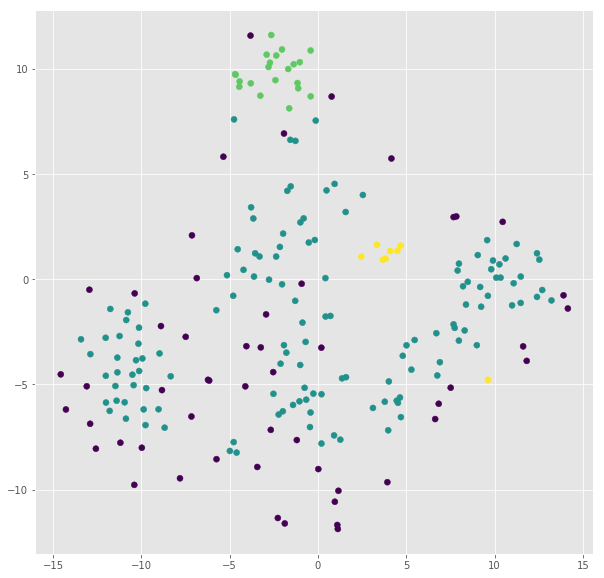

In [58]:
pl.figure(figsize=(10, 10))
plt.scatter(tsne_vis_db[:, 0], tsne_vis_db[:, 1], c=clt.labels)

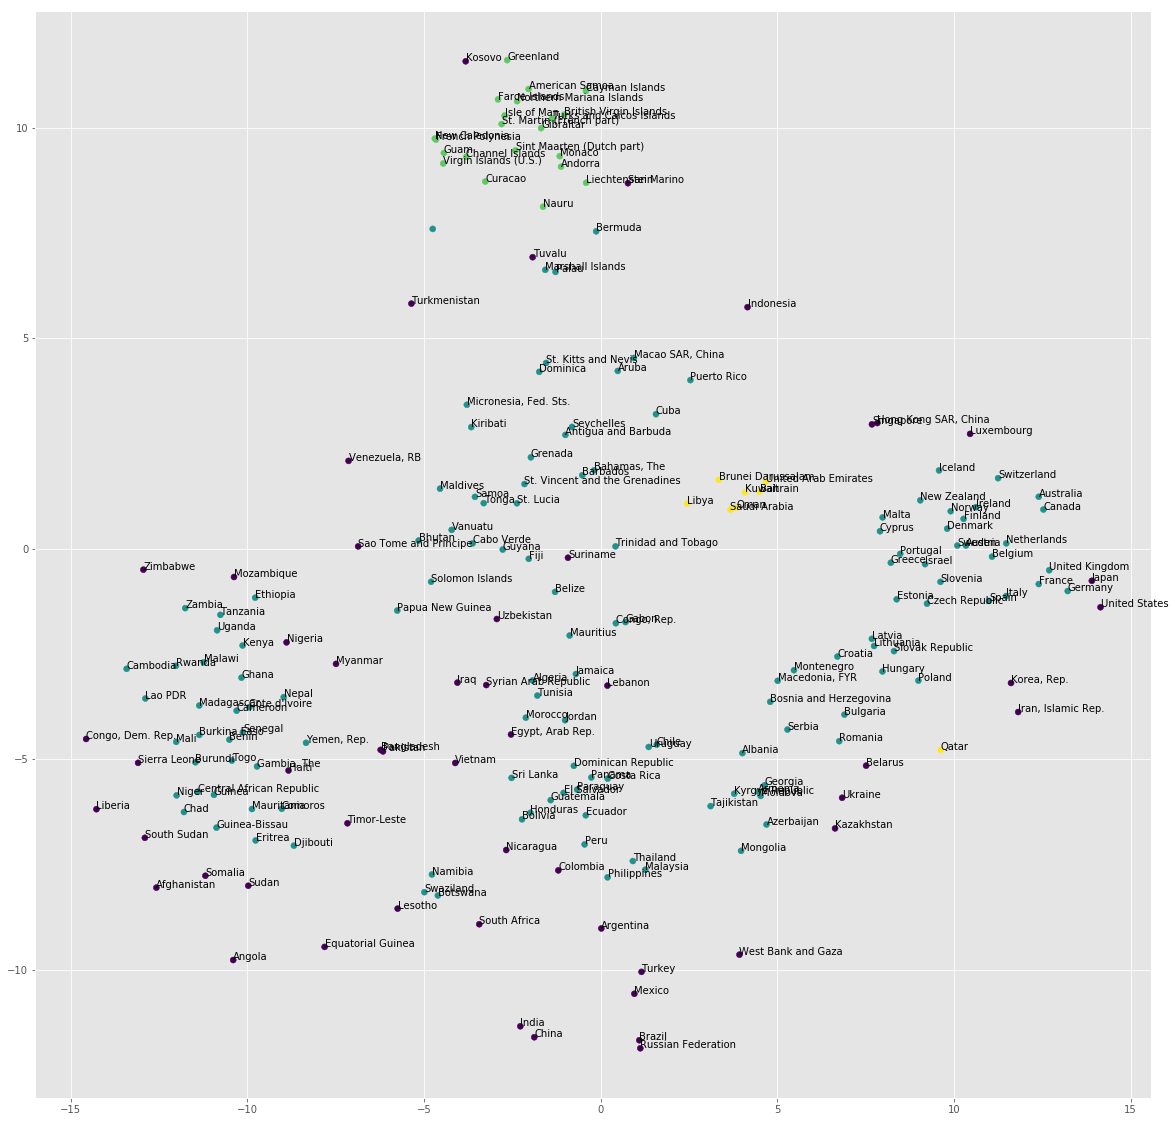

In [59]:
pl.figure(figsize=(20, 20))
plt.scatter(tsne_vis_db[:, 0], tsne_vis_db[:, 1], c=clt.labels);
for i in range(len(country_names)):
    try:
        plt.annotate(country_names[i], (tsne_vis_db[i, 0], tsne_vis_db[i, 1]))
    except UnicodeDecodeError:
        continue

Кластеризация полученных точек с помощью метода DBSCAN плохо применима из-за того что точки рассредоточены в пространстве и нет очевидных сгустков, и во время кластеризации всё объединятся в один кластер. 

### Сравним результат с кластеризацией методом Kmeans

In [642]:
from sklearn.cluster import KMeans

In [661]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [662]:
labels = kmeans.labels_

#### Визуализируем с помощью TSNE для kmeans

In [663]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)
tsne_vis = tsne.fit_transform(X)

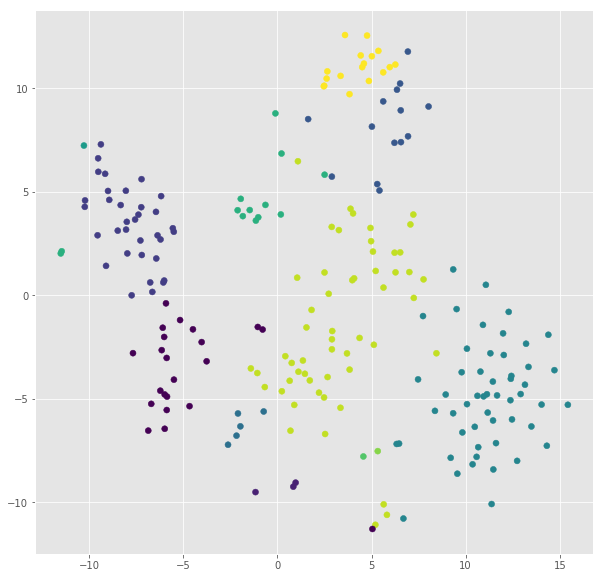

In [664]:
pl.figure(figsize=(10, 10))
plt.scatter(tsne_vis[:, 0], tsne_vis[:, 1], c=labels)

Подпишем страны

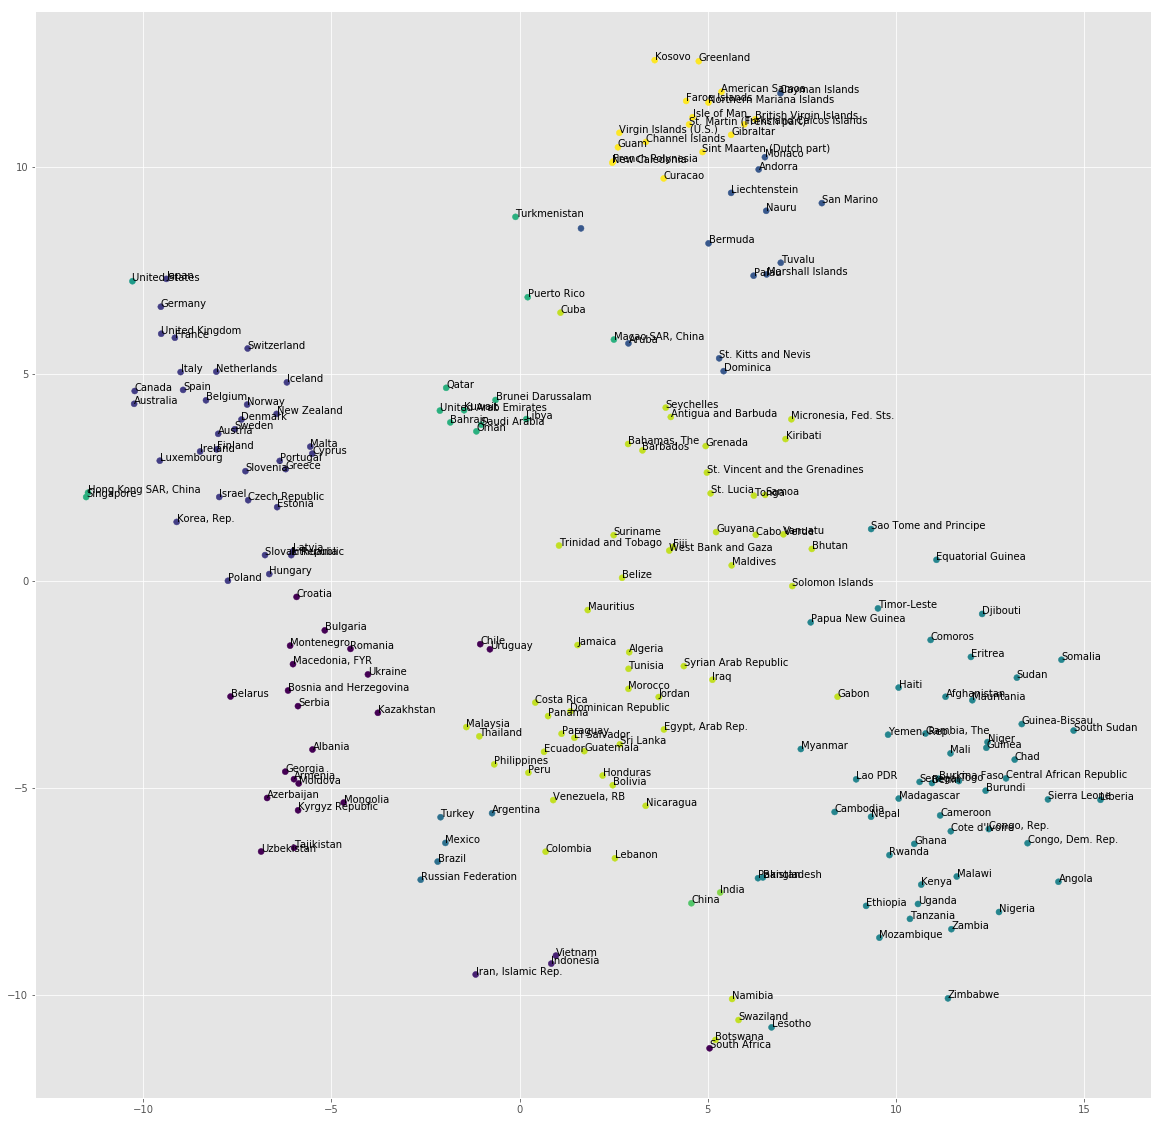

In [665]:
pl.figure(figsize=(20, 20))
plt.scatter(tsne_vis[:, 0], tsne_vis[:, 1], c=labels);
for i in range(len(country_names)):
    try:
        plt.annotate(country_names[i], (tsne_vis[i, 0], tsne_vis[i, 1]))
    except UnicodeDecodeError:
        continue

In [ ]:
## Задание 4

На визуализации видно разделение стран на кластеры

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.